In [1]:
import os

# Path to Save
file_model_path = "D:\\Cloud Folder\\OneDrive - UGM 365\\(00) Penelitian TF\\Model\\240924 - Model ANN\\"

# Ensure the directory exists
os.makedirs('Model', exist_ok=True)
os.makedirs('Excel', exist_ok=True)
os.makedirs('Gambar', exist_ok=True)
os.makedirs('Gambar/Heatmap', exist_ok=True)
os.makedirs('Gambar/Best Worst', exist_ok=True)

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate metrics definition
def calculate_metrics(true, pred):
    r2 = r2_score(true, pred, multioutput='raw_values')
    mse = mean_squared_error(true, pred, multioutput='raw_values')
    mae = mean_absolute_error(true, pred, multioutput='raw_values')
    return r2, mse, mae

# Load the arrays
y_test = np.load('Array/y_test_true.npy')
y_pred = np.load('Array/y_test_pred.npy')
y_train = np.load('Array/y_train_true.npy')
y_pred_train = np.load('Array/y_train_pred.npy')
test_indices = np.load('Array/test_indices.npy')
train_indices = np.load('Array/train_indices.npy')

# Change shape array
y_test = y_test.reshape(6006,3)
y_pred = y_pred.reshape(6006,3)
y_train = y_train.reshape(23562,3)
y_pred_train = y_pred_train.reshape(23562,3)

# Training Metrics
r2_train, mse_train, mae_train = calculate_metrics(y_train, y_pred_train)

# Testing Metrics
r2_test, mse_test, mae_test = calculate_metrics(y_test, y_pred)

# Output the results
print("\n===== Model Performance =====")
print("Training Set:")
print(f"  R2 Score: {r2_train}")
print(f"  MSE: {mse_train}")
print(f"  MAE: {mae_train}")

print("\nTesting Set:")
print(f"  R2 Score: {r2_test}")
print(f"  MSE: {mse_test}")
print(f"  MAE: {mae_test}")


===== Model Performance =====
Training Set:
  R2 Score: [0.9537176  0.9704386  0.97937703]
  MSE: [0.00312828 0.00201278 0.00055552]
  MAE: [0.03761705 0.03151889 0.01692153]

Testing Set:
  R2 Score: [0.8682349 0.8510684 0.9533989]
  MSE: [0.00868975 0.00642734 0.00157849]
  MAE: [0.0526168  0.04496344 0.02689244]


# **LOAD ARRAY**

In [3]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate metrics definition
def calculate_metrics(true, pred):
    r2 = r2_score(true, pred, multioutput='uniform_average')
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    return r2, mse, mae

# Load the arrays
y_test = np.load('Array/y_test_true.npy')
y_pred = np.load('Array/y_test_pred.npy')
y_train = np.load('Array/y_train_true.npy')
y_pred_train = np.load('Array/y_train_pred.npy')
test_indices = np.load('Array/test_indices.npy')
train_indices = np.load('Array/train_indices.npy')

# Training Metrics
r2_train, mse_train, mae_train = calculate_metrics(y_train, y_pred_train)

# Testing Metrics
r2_test, mse_test, mae_test = calculate_metrics(y_test, y_pred)

# Output the results
print("\n===== Model Performance =====")
print("Training Set:")
print(f"  R2 Score: {r2_train:.4f}")
print(f"  MSE: {mse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")

print("\nTesting Set:")
print(f"  R2 Score: {r2_test:.4f}")
print(f"  MSE: {mse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")

# Load the scalers
scaler_X = joblib.load('Model/Scaler_X.joblib')
scaler_y = joblib.load('Model/Scaler_y.joblib')

# Inverse transform the predictions and true values to original scale
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_train_orig = scaler_y.inverse_transform(y_train)
y_pred_train_orig = scaler_y.inverse_transform(y_pred_train)

# Change shape array
y_test = y_test.reshape(6006,3)
y_pred = y_pred.reshape(6006,3)
y_train = y_train.reshape(23562,3)
y_pred_train = y_pred_train.reshape(23562,3)

y_test_orig = y_test_orig.reshape(6006, 3)
y_pred_orig = y_pred_orig.reshape(6006, 3)
y_train_orig = y_train_orig.reshape(23562, 3)
y_pred_train_orig = y_pred_train_orig.reshape(23562, 3)

# Create the arrays
array_y_test = []
array_y_pred = []
array_y_test_orig = []
array_y_pred_orig = []
array_y_train = []
array_y_pred_train = []
array_y_train_orig = []
array_y_pred_train_orig = []

pred_array = []  # Initialize pred_array
results_array = []  # Initialize result_array

# Create 154 output array
for i in range(154):
    array_y_test_orig.append(y_test_orig[i::154])
    array_y_pred_orig.append(y_pred_orig[i::154])
    array_y_test.append(y_test[i::154])
    array_y_pred.append(y_pred[i::154])
    array_y_train.append(y_train[i::154])
    array_y_pred_train.append(y_pred_train[i::154])
    array_y_train_orig.append(y_train_orig[i::154])
    array_y_pred_train_orig.append(y_pred_train_orig[i::154])

for i in range(154):
    # Calculate metrics
    r2_train = r2_score(array_y_train[i], array_y_pred_train[i])
    mae_train = mean_absolute_error(array_y_train[i], array_y_pred_train[i])
    mse_train = mean_squared_error(array_y_train[i], array_y_pred_train[i])

    r2_test = r2_score(array_y_test[i], array_y_pred[i])
    mae_test = mean_absolute_error(array_y_test[i], array_y_pred[i])
    mse_test = mean_squared_error(array_y_test[i], array_y_pred[i])

    array1 = np.array(test_indices)
    array2 = np.array(array_y_pred_orig[i])
    array3 = np.array(array_y_test_orig[i])

    # Calculate the percentage error where y_test is not zero
    percentage_error = np.zeros_like(array2)  # Initialize with zeros
    mask = array3 != 0  # Mask where y_test is not zero

    # Calculate percentage error only where y_test is not zero
    percentage_error[mask] = np.abs((array2[mask] - array3[mask]) / array3[mask]) * 100

    # Initialize mean error array
    mean_error = np.zeros(array3.shape[0])

    # Calculate mean error for each row, ignoring zeros in y_test
    for j in range(array3.shape[0]):
        if np.any(mask[j]):  # Check if there are any valid entries in the row
            mean_error[j] = np.mean(percentage_error[j][mask[j]])

    # Append the mean percentage error as a new column to percentage_error
    percentage_error_with_mean = np.hstack((percentage_error, mean_error.reshape(-1, 1)))

    frame = np.hstack((array1.reshape(39,1), array2, array3, percentage_error_with_mean))
    pred_array.append(frame)
    results_array.append((r2_train, mse_train, mae_train, r2_test, mse_test, mae_test))

# Define column names
columns = [
    'R2 (Train)', 'MSE (Train)', 'MAE (Train)',
    'R2 (Test)', 'MSE (Test)', 'MAE (Test)'
]

# Create a DataFrame from the array
results_df = pd.DataFrame(results_array, columns=columns)


===== Model Performance =====
Training Set:
  R2 Score: 0.9555
  MSE: 0.0019
  MAE: 0.0287

Testing Set:
  R2 Score: 0.8623
  MSE: 0.0056
  MAE: 0.0415


In [4]:
np_array = np.array(pred_array)

# Stack the arrays along a new axis to create a 3D array of shape (154, 39, 7)
combined_array = np.stack(np_array)

# Transpose the array to swap the first two axes, resulting in a shape of (39, 154, 7)
predict_np_transpose = combined_array.transpose(1, 0, 2)

In [5]:
results_df.describe

<bound method NDFrame.describe of      R2 (Train)  MSE (Train)  MAE (Train)  R2 (Test)  MSE (Test)  MAE (Test)
0      0.938339     0.003666     0.041686   0.859681    0.007850    0.058801
1      0.958285     0.002572     0.034274   0.888430    0.004841    0.045609
2      0.965809     0.001733     0.029159   0.911394    0.004096    0.042712
3      0.973858     0.001404     0.027680   0.907848    0.004746    0.046115
4      0.977123     0.001301     0.026427   0.931264    0.003863    0.040137
..          ...          ...          ...        ...         ...         ...
149    0.958529     0.001817     0.031444   0.932779    0.002152    0.035989
150    0.966761     0.001632     0.029854   0.937346    0.002260    0.036211
151    0.960723     0.002154     0.033249   0.793899    0.008376    0.051103
152    0.959721     0.002180     0.033480   0.938565    0.002403    0.037712
153    0.958732     0.002306     0.033346   0.931740    0.003023    0.039680

[154 rows x 6 columns]>

In [6]:
df = results_df

# Define the path to save the Excel file
excel_file_path = 'Excel/Test Results.xlsx'

# Save the DataFrame to an Excel file using the xlsxwriter engine
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='Results', index=False)

print(f"DataFrame saved to {excel_file_path}")

DataFrame saved to Excel/Test Results.xlsx


In [7]:
# Load the spreadsheet
excel_file_path = 'Excel/Test Results.xlsx'
df = pd.read_excel(excel_file_path)

# Calculate summary statistics
summary = df.describe().loc[['min', 'max', 'mean', 'std']]

# Create a new sheet with the summary
with pd.ExcelWriter(excel_file_path, mode='a', engine='openpyxl') as writer:
    summary.to_excel(writer, sheet_name='Summary Statistics')

print("Summary statistics have been added to the new sheet 'Summary Statistics'")

Summary statistics have been added to the new sheet 'Summary Statistics'


In [8]:
import numpy as np

# Define the path to save the Excel file
excel_file_path = 'Excel/Data Results.xlsx'

# Use pandas ExcelWriter to write each array to a separate sheet
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    for i, array in enumerate(predict_np_transpose):
        df = pd.DataFrame(array)
        df.to_excel(writer, sheet_name=f'{i+1}', index=False)

print(f"Data saved to {excel_file_path}")

Data saved to Excel/Data Results.xlsx


# **VISUALISASI HEATMAP**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# Load the spreadsheet
file_path = 'Excel/Test Results.xlsx' # Replace with your actual file path
df = pd.read_excel(file_path)

In [11]:
# Reshape data for heatmap visualization
def create_heatmap_data(column_data):
    data_matrix = column_data.values.reshape(11, 14)
    return data_matrix

columns = df.columns

# Create a heatmap for each column in the dataframe and save the images
for col in columns:
    heatmap_data = create_heatmap_data(df[col])
    plt.figure(figsize=(10, 8))
    if col == 'R2 (Train)' or col == 'R2 (Test)':
        sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='white', vmin=0, vmax=1)
    else:
        sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='white')
    plt.title(f'Heatmap for {col}')
    plt.savefig('Gambar/Heatmap/Heatmap_{col}.png')
    plt.close()

# **BEST AND WORST**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
# Load the spreadsheet
file_path = 'Excel/Summary.xlsx'
df = pd.read_excel(file_path)

# Remove the first column
df = df.drop(df.columns[0], axis=1)

# Get the row indices with the max value of each column
max_row_indices = df.idxmax().values

# Get the row indices with the min value of each column
min_row_indices = df.idxmin().values

# Convert indices to lists
max_row_indices_list = list(max_row_indices)
min_row_indices_list = list(min_row_indices)

# Remove the last element from both lists
max_row_indices_list = max_row_indices_list[:-1]
min_row_indices_list = min_row_indices_list[:-1]

# Combine the two lists, max first then min
maxmin_list = max_row_indices_list + min_row_indices_list

print("Combined list:", maxmin_list)

Combined list: [2, 18, 18, 14, 31, 20]


In [14]:
def case_plot(value):
    if value == 'Air Velocity':
        return "viridis"
    elif value == 'Indoor Temperature':
        return "rainbow"
    elif value == 'Indoor Relative Humidity':
        return "Blues"
    else:
        return "Default case"

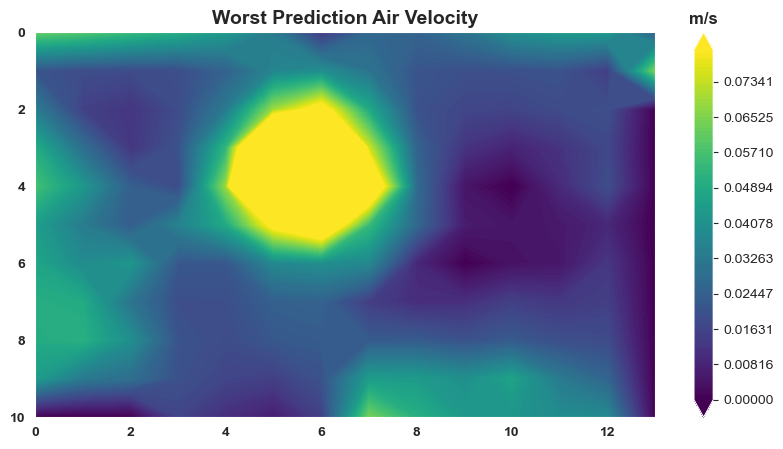

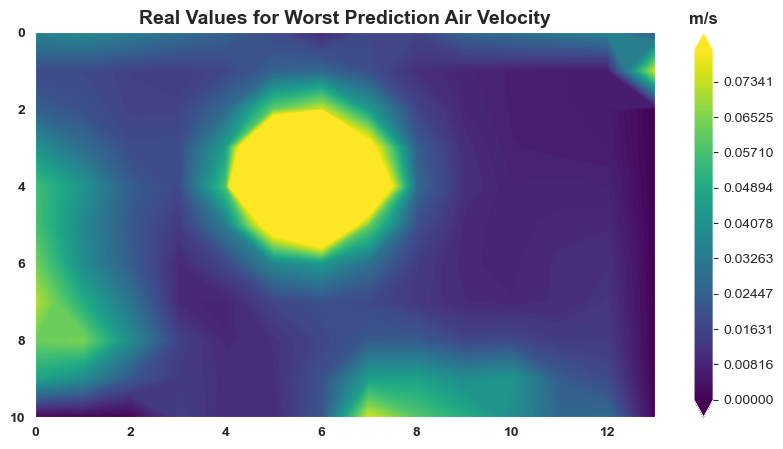

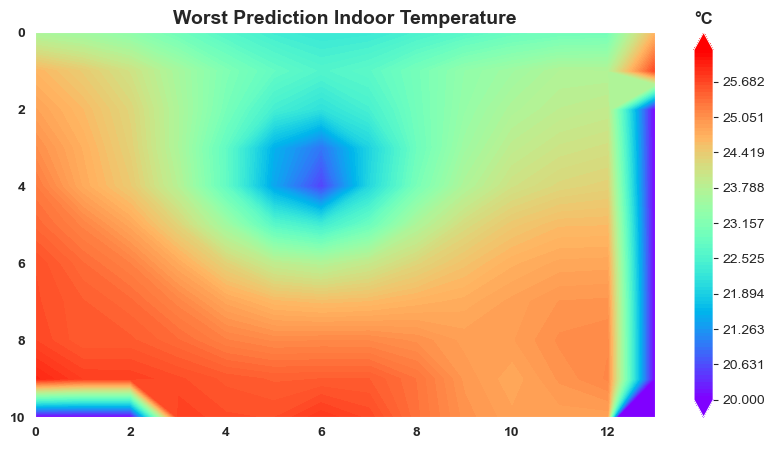

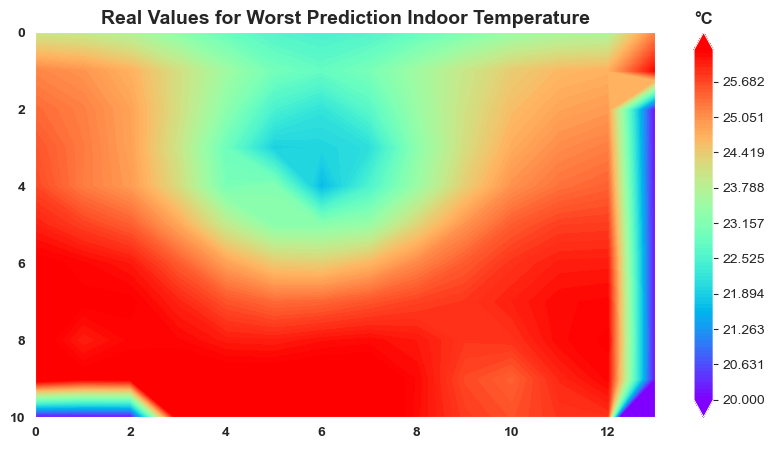

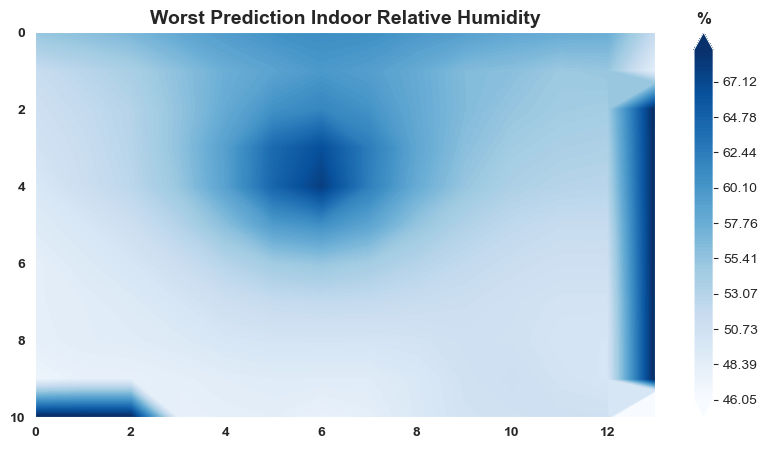

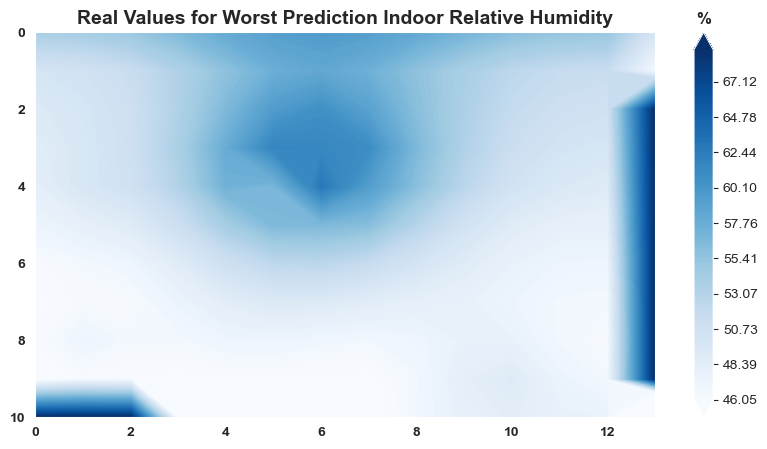

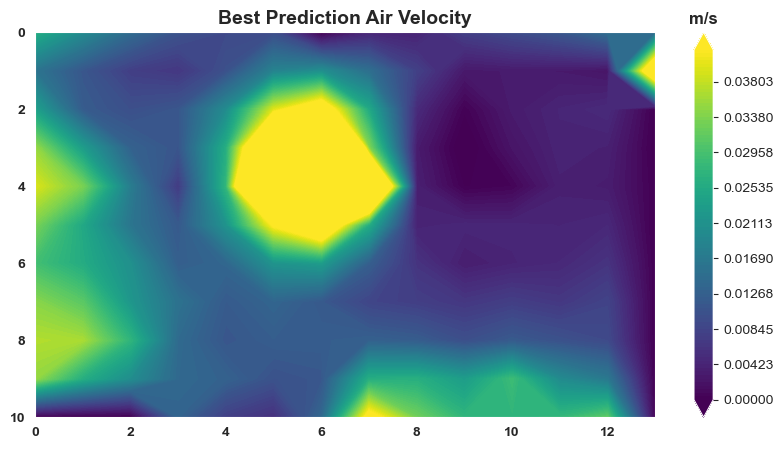

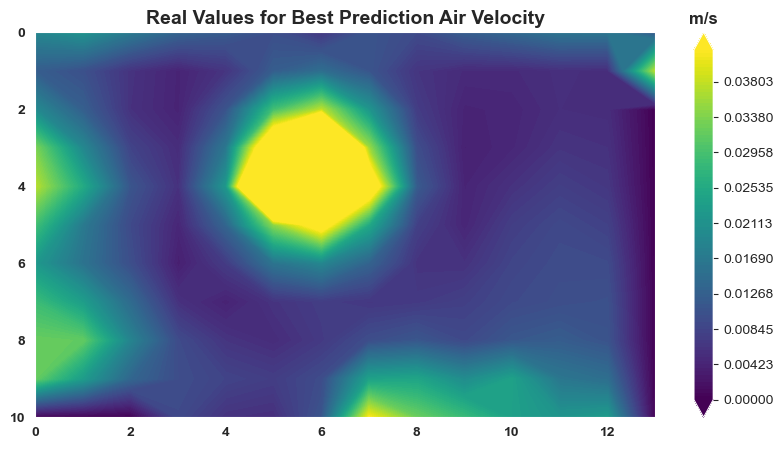

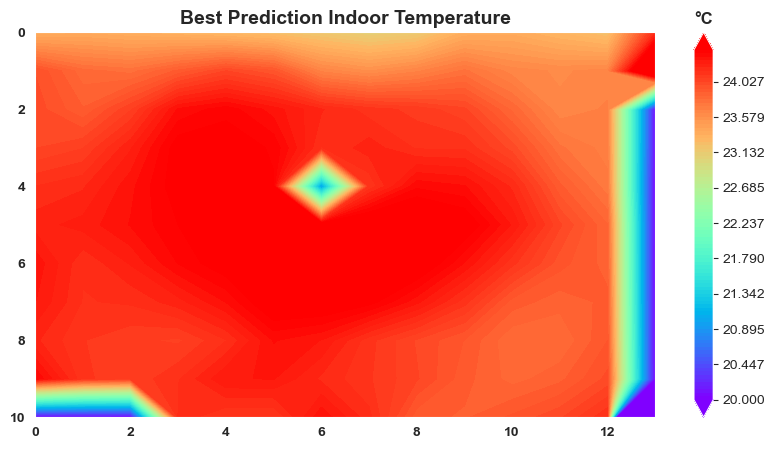

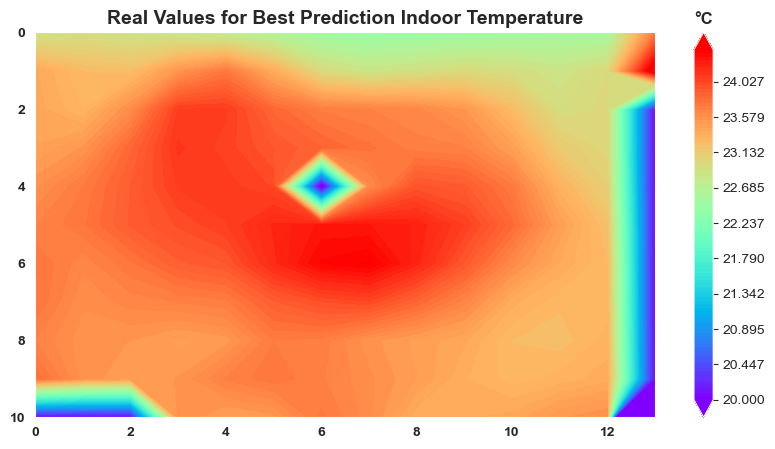

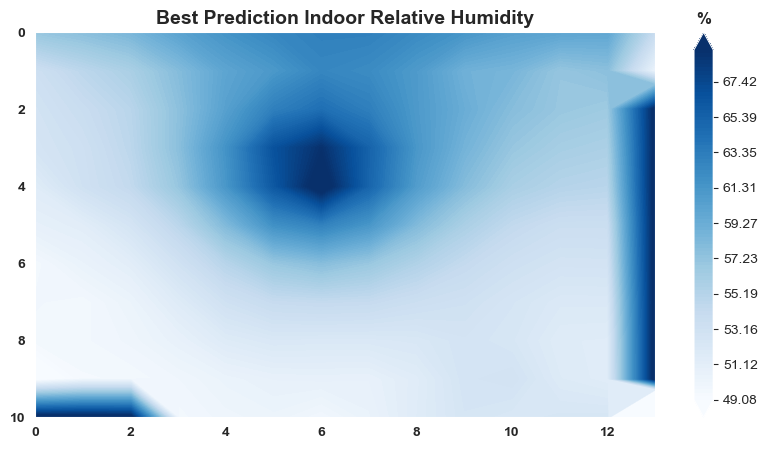

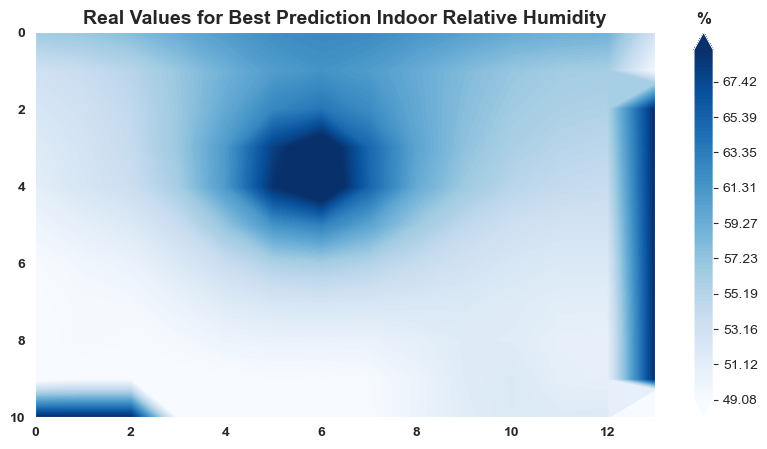

In [15]:
# Load the spreadsheet and specify the sheet name
file_path = 'Excel/Data Results.xlsx'  # Replace with your actual file path

# Function to calculate the percentile-based vmin and vmax
def get_vmin_vmax(data, lower_percentile=5, upper_percentile=95):
    vmin = np.percentile(data, lower_percentile)
    vmax = np.percentile(data, upper_percentile)
    return vmin, vmax

# Directory to save the heatmap images
output_dir = 'Gambar/Best Worst'  # Replace with your desired output directory

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop 1 values
loop1_values = ["Worst", "Best"]

# Loop 2 values
loop2_values = ["Air Velocity", "Indoor Temperature", "Indoor Relative Humidity"]

#l Loop 3 values
loop3_values = ["m/s", '°C', "%"]



# Initiate values
i_value = 0

for loop1 in loop1_values:
    j_value = 0

    for loop2 in loop2_values:
        cmap = case_plot(loop2)

        df = pd.read_excel(file_path, sheet_name=f'{maxmin_list[i_value]+1}')

        # Remove the first row (header) and first column
        data = df.iloc[1:, 1+j_value].values
        
        # Adjust the reshaping to fit a 14x11 grid (correcting the size)
        data_matrix_pred = np.pad(data, (0, 1), mode='constant').reshape(11, 14)
        
        # Remove the first row (header) and first column
        data = df.iloc[1:, 4+j_value].values

        # Adjust the reshaping to fit a 14x11 grid (correcting the size)
        data_matrix_real = np.pad(data, (0, 1), mode='constant').reshape(11, 14)
        
        # Combine predict and real data
        combined_array = np.concatenate((data_matrix_pred.flatten(), data_matrix_real.flatten()))
        vmin, vmax = get_vmin_vmax(combined_array)
        
        #LOOPING FOR PREDICTION --------------------------------------------------------------

        # Create contour heatmap with smoother gradation and "plasma" colormap
        plt.figure(figsize=(10, 5))
        # Create a grid for X and Y axes
        x = np.arange(14)  # X-axis (14 columns)
        y = np.arange(11)  # Y-axis (11 rows), reversed to mirror
        
        X, Y = np.meshgrid(x, y)
        
        contour = plt.contourf(X, Y, data_matrix_pred, levels=np.arange(vmin, vmax, (vmax-vmin)/100), cmap=cmap, extend='both')
        
        # Define colorbar boundaries
        cbar = plt.colorbar(contour)

        # Set the label above the colorbar with degree Celsius symbol
        cbar.ax.set_title(loop3_values[j_value], fontsize=12, fontweight='bold')

        plt.title(f'{loop1} Prediction {loop2}', fontsize=14, fontweight='bold')

        # Make axis labels and ticks bold
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')
        plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
        # Invert the y-axis so 0 is at the top
        plt.gca().invert_yaxis()
        for label in plt.gca().get_xticklabels():
            label.set_fontweight('bold')
        for label in plt.gca().get_yticklabels():
            label.set_fontweight('bold')

        # Remove gridlines
        plt.gca().grid(False)

        # Save the plasma colormap heatmap
        output_file = os.path.join(output_dir, f'{loop1} Heatmap {loop2}.png')
        plt.savefig(output_file)

        #LOOPING FOR REAL PREDICTION --------------------------------------------------------------

        # Create contour heatmap with smoother gradation and "plasma" colormap
        plt.figure(figsize=(10, 5))
        # Create a grid for X and Y axes
        x = np.arange(14)  # X-axis (14 columns)
        y = np.arange(11)  # Y-axis (11 rows), reversed to mirror
        
        X, Y = np.meshgrid(x, y)
        
        contour = plt.contourf(X, Y, data_matrix_real, levels=np.arange(vmin, vmax, (vmax-vmin)/100), cmap=cmap, extend='both')

        # Set the colorbar
        cbar = plt.colorbar(contour)

        # Set the label above the colorbar with degree Celsius symbol
        cbar.ax.set_title(loop3_values[j_value], fontsize=12, fontweight='bold')

        plt.title(f'Real Values for {loop1} Prediction {loop2}', fontsize=14, fontweight='bold')

        # Make axis labels and ticks bold
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')
        plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
        # Invert the y-axis so 0 is at the top
        plt.gca().invert_yaxis()
        for label in plt.gca().get_xticklabels():
            label.set_fontweight('bold')
        for label in plt.gca().get_yticklabels():
            label.set_fontweight('bold')

        # Remove gridlines
        plt.gca().grid(False)

        # Save the plasma colormap heatmap
        output_file = os.path.join(output_dir, f'{loop1} Heatmap {loop2} Real.png')
        plt.savefig(output_file)

        j_value += 1
        i_value += 1